In [2]:
# %load deep_module.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
# 0 : T-shirt/top, 1 : Trouser, 2 : Pullover, 3 : Dress, 4 : Coat, 5 : Sandal
# 6 : Shirt, 7 : Sneaker, 8 : Bag, 9 : Ankel boot

print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [5]:
X_train = X_train.astype('float64') / 255
X_test = X_test.astype('float64') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
stoppoint = EarlyStopping(monitor='val_loss', patience=20)

model = Sequential(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.2, callbacks=[stoppoint])

Epoch 1/50
240/240 [==============================] - 4s 13ms/step - loss: 0.5571 - accuracy: 0.8067 - val_loss: 0.4432 - val_accuracy: 0.8391
Epoch 2/50
240/240 [==============================] - 3s 12ms/step - loss: 0.4012 - accuracy: 0.8580 - val_loss: 0.4125 - val_accuracy: 0.8537
Epoch 3/50
240/240 [==============================] - 3s 13ms/step - loss: 0.3597 - accuracy: 0.8733 - val_loss: 0.3660 - val_accuracy: 0.8700
Epoch 4/50
240/240 [==============================] - 3s 12ms/step - loss: 0.3286 - accuracy: 0.8823 - val_loss: 0.3433 - val_accuracy: 0.8773
Epoch 5/50
240/240 [==============================] - 3s 13ms/step - loss: 0.3056 - accuracy: 0.8894 - val_loss: 0.3330 - val_accuracy: 0.8809
Epoch 6/50
240/240 [==============================] - 3s 12ms/step - loss: 0.2888 - accuracy: 0.8950 - val_loss: 0.3768 - val_accuracy: 0.8603
Epoch 7/50
240/240 [==============================] - 3s 13ms/step - loss: 0.2738 - accuracy: 0.9002 - val_loss: 0.3154 - val_accuracy: 0.8875

<function matplotlib.pyplot.show(close=None, block=None)>

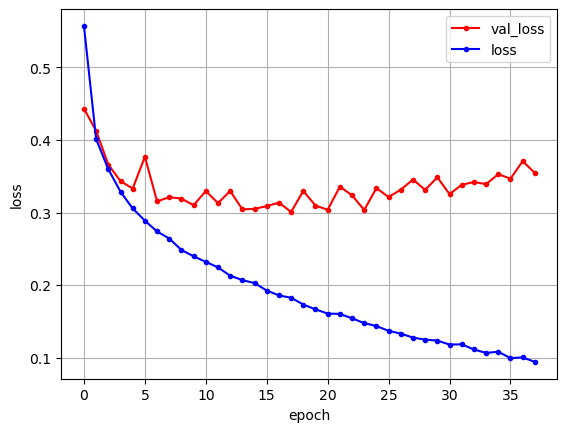

In [7]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='val_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show

In [8]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3866 - accuracy: 0.8873


In [9]:
from PIL import Image
 
# 이미지 열기
im = Image.open('./data/img/shoose-1.jpg')
# 이미지 크기 출력
print(im.size)
im = im.resize((28, 28))

x = 255 - (np.array(im)[:,:,0]) #  숫자로 변환 시킴
print(x.shape)

(400, 431)
(28, 28)


1/1 [==============================] - 0s 26ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


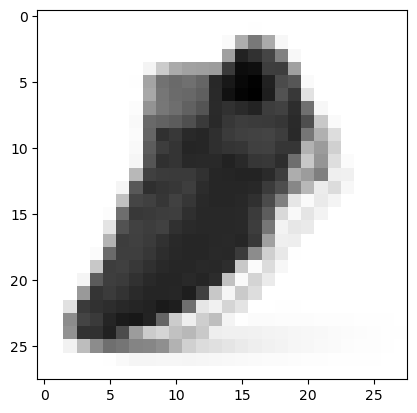

In [18]:
# print(x.reshape(1, 28, 28))
x = x.reshape(1, 28, 28)
print(model.predict(x))
plt.imshow(x[0], cmap='Greys')
plt.show()

In [29]:
X_test[0].reshape(1,28, 28)

(1, 28, 28)

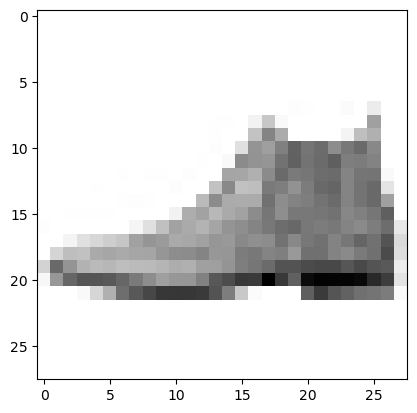

In [31]:
plt.imshow(X_test[0], cmap='Greys')
plt.show()